# <center> Assignment Multiple Linear Regression 50_Startups </center> 

## Problem Statement : Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

### Dataset: 50_Startups.csv

### Columns meaning:

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected-
- Profit  -- profit of each state in the past few years

In [1]:
# importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot # influence plot will be used for calculating leverage value
import statsmodels.formula.api as smf # for building our model
import numpy as np

In [2]:
#reading the dataset
startup_data=pd.read_csv('50_Startups.csv')
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# renaming columns
startup_data.rename(columns={'R&D Spend':'RdSpend','Marketing Spend':'MarketingSpend'}, inplace=True)
startup_data.head()

,RdSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup_data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
startup_data['State']=startup_data['State'].replace(to_replace='New York',value=1)
startup_data['State']=startup_data['State'].replace(to_replace='California',value=2)
startup_data['State']=startup_data['State'].replace(to_replace='Florida',value=3)
startup_data.head()

,RdSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


In [6]:
# explore dataset
print("Rows and Columns: ",startup_data.shape,'\n')
print("Baisc information: ", startup_data.info(),'\n')
print("list number of null values in dataset:",'\n',startup_data.isna().sum())

Rows and Columns:  (50, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RdSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB
Baisc information:  None 

list number of null values in dataset: 
 RdSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64


#### Number of rows: 50, columns is 50
#### there are no null values in dataset

In [7]:
#correlation matrix
startup_data.corr()

,RdSpend,Administration,MarketingSpend,State,Profit
RdSpend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


#### from correlation results we observe 
- there is strong postive 0.97 correlation between R&D and Profit
- ther is strong positive correlationon ebetween Marketing spend and Profit : 0.74
- there is strong positive correlationon being indicated between Marketing spend and R&D spend
- State has almost 0 correlation with profit, meaning its playing no role in profits.

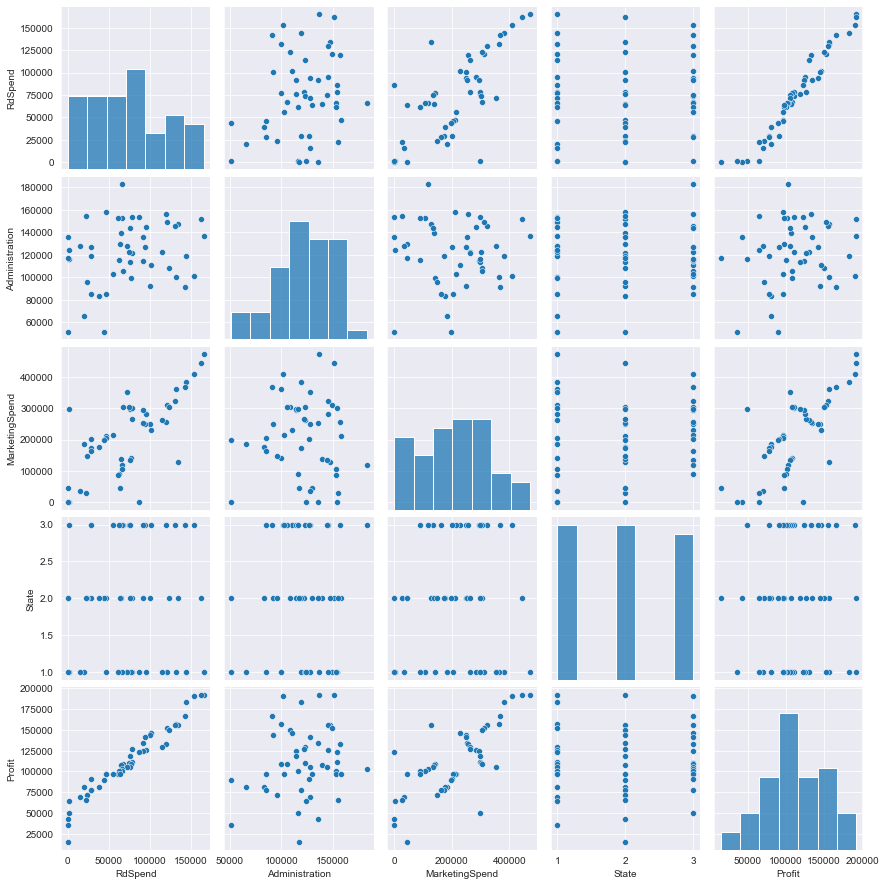

In [8]:
# create pairplot
sns.set_style(style='darkgrid')
sns.pairplot(startup_data)

#### Pairplot observations:
- Profit and Marketing Spend: have postive linear relationship
- Profit and Administration does appear to have any pattern seems like no relation between profit and administration
- Profit and R&D spend shows strong positive correlation
- Administration and R&D spend has no pattern seems like no relation between profit and administration
- R&D spend and Marketing spend shows positive correlation 

In [9]:
start_data_woS=startup_data.drop('State',axis=1)
start_data_woS.head()

,RdSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


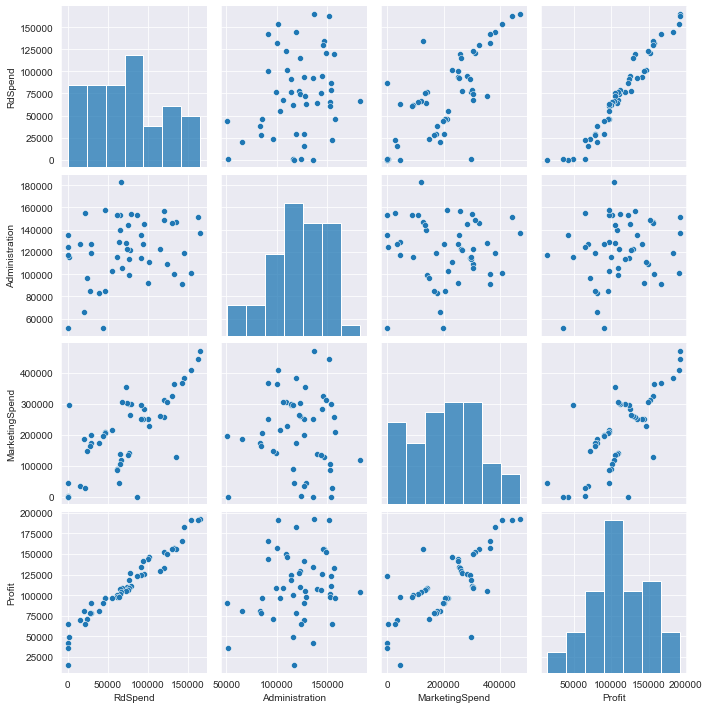

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(start_data_woS)

In [11]:
#Building initial Model
import statsmodels.formula.api as smf 
initial_model_woS=smf.ols('Profit~RdSpend + Administration + MarketingSpend',data=start_data_woS).fit()
initial_model_woS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.53e-30
Time:                        16:32:50   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RdSpend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### result of model output
- R squared: 0.951
- adjusted R squared: 0.948
- coeeficients:
    - bet0:  5.012e+04
    - beat1: 0.8057
    - beta2:-0.0268
    - beta3: 0.0268
- pvalues of each variable to see if there are any insignificant variables
   
    - RdSpend	        0.00  :value is __less than 0.05, Significant__	
    - Administration	0.602 : value is __greater than 0.05, non significant__
    - MarketingSpend	0.105 : value is __greater than 0.05,non significant__

## Analyze individaul significance level of Administration and MarketingSpend using Simple Liner Regression Models

In [12]:
# SLR Model with Administration
model_administration=smf.ols('Profit~Administration',data = start_data_woS).fit()  
model_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 18 May 2022   Prob (F-statistic):              0.162
Time:                        16:32:50   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### p value of Administration is 0.162 which greater than 0.05, thus administration is Non siginificant at indvidual level as well.

In [13]:
# SLR Model with MarketingSpend
model_MarketingSpend=smf.ols('Profit~MarketingSpend',data = start_data_woS).fit()  
# model summary
model_MarketingSpend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.38e-10
Time:                        16:32:50   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MarketingSpend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### p value of MarketingSpend is 0.000 which less than 0.05, thus MarketingSpend is Siginificant at indvidual level

In [14]:
# SLR Model with Administration and MarketingSpend
model_combined=smf.ols('Profit~Administration+MarketingSpend',data = start_data_woS).fit()  
# model summary
model_combined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.50e-10
Time:                        16:32:50   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
MarketingSpend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__p value__ for __Administration__: 0.017, __less than 0.05: Significant__<br>
__p value__ for __MarketingSpend__: 0.000, __less than 0.05: Significant__<br>

### From Pariplot also we see postive association between  MarketingSpend and Asdministration, however as per rules for MLR, the independent variable should not have any relation, so we need to drop one of them.

### Calcualte VIF for all independent variables and Rquared values

In [15]:
startup_data.columns

Index(['RdSpend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

In [16]:
#Calculating Validation influence Factor
rsq_MarketingSpend = smf.ols('MarketingSpend~Administration+RdSpend',data=start_data_woS).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)


rsq_Administration = smf.ols('Administration~MarketingSpend+RdSpend',data=start_data_woS).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)


rsq_RdSpend = smf.ols('RdSpend~MarketingSpend+Administration',data=start_data_woS).fit().rsquared  
vif_RdSpend = 1/(1-rsq_RdSpend )



# Storing vif values in a data frame
d1 = {'Variables':['RdSpend','Administration','MarketingSpend'],'VIF':[vif_RdSpend,vif_Administration,vif_MarketingSpend],'RSquared':[rsq_RdSpend,rsq_Administration,rsq_MarketingSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF,RSquared
0,RdSpend,2.468903,0.594962
1,Administration,1.175091,0.149002
2,MarketingSpend,2.326773,0.570220


### VIF of marketing spend is greater than Administration, so we can drop Marketing Spend 

In [17]:
#Comparing AIC for models for Administrationa and MarketingSpend
aic_values={'Model':['Administration','MarketSpend'],'AIC':[model_administration.aic,model_MarketingSpend.aic]}
aic_df=pd.DataFrame(aic_values)
aic_df

,Model,AIC
0,Administration,1203.253670
1,MarketSpend,1164.356792


### AIC of Marketspend is less than model of Adminsitration, so can drop Administration.

##  Residual Analysis

### Te
st for Normality of Residuals (Q-Q Plot)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


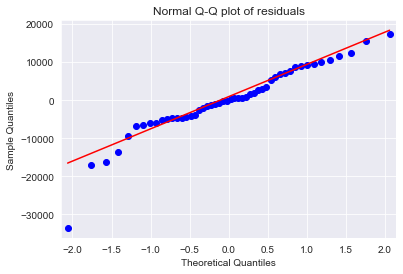

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(initial_model_woS.resid,line='q') # line = q to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

from __qqplot__ we can observe not all residulas are on qq line, we have outliers as well.

### Residual Plot for Homoscedasticity

In [19]:
# function to standardize fitted values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

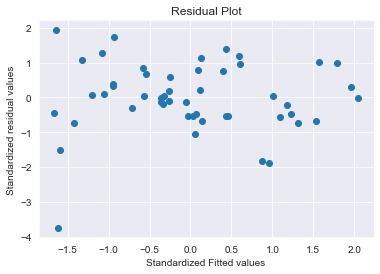

In [20]:
#creating scattered plot between standardized fitted values and residuls 
plt.scatter(get_standardized_values(initial_model_woS.fittedvalues),
            get_standardized_values(initial_model_woS.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

__from Residual Fitted vs residulas__ plot, we observe not pattern is there and all residuals corresponding to fitted values are falling around mean value 0, and also we have outliers.

### Residual Vs Regressors

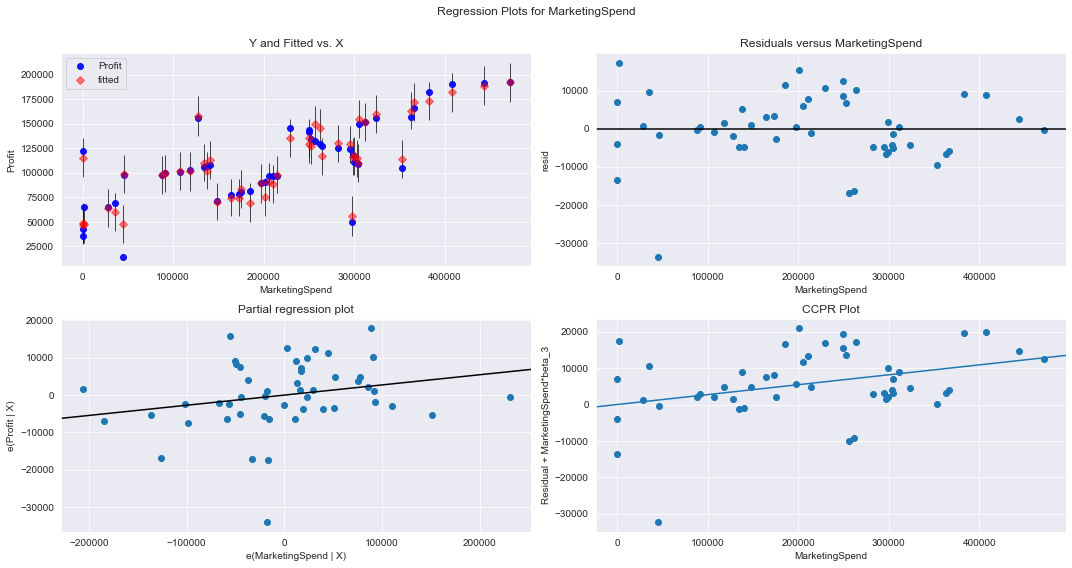

In [21]:
#with MarketingSpend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(initial_model_woS, "MarketingSpend", fig=fig)
plt.show()

__Residual Vs MarketingSpend__:
- no pattern
__Partial Regression Plot__:
- there is positive relation seen

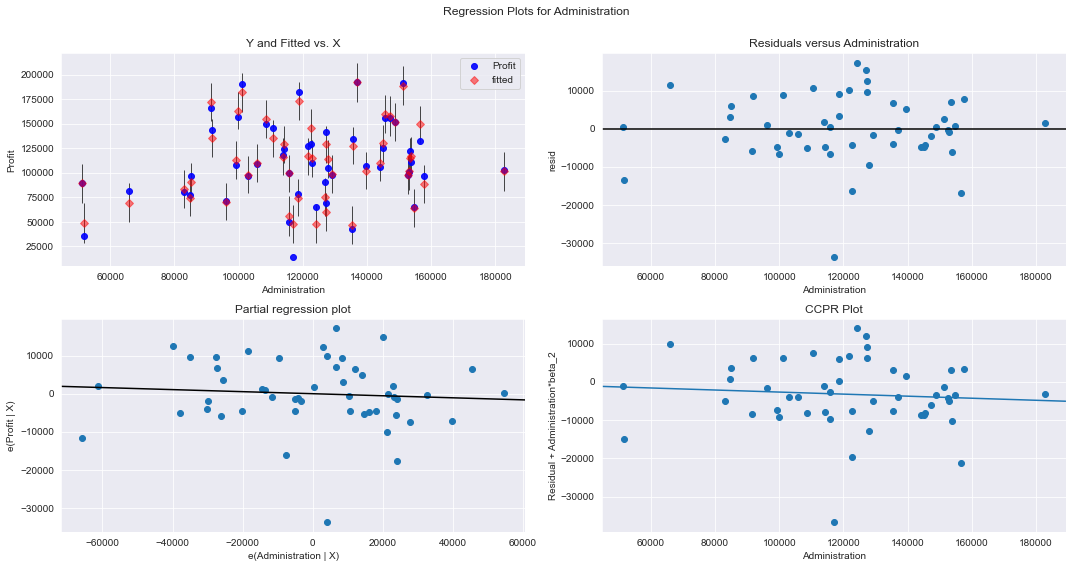

In [22]:
#with ADministration
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(initial_model_woS, "Administration", fig=fig)
plt.show()

__Residual Vs Administration:
- no pattern
__Partial Regression Plot__:
- no specific pattern observed, however the line is slighty bending towrads right, there could be negative corr, however minor

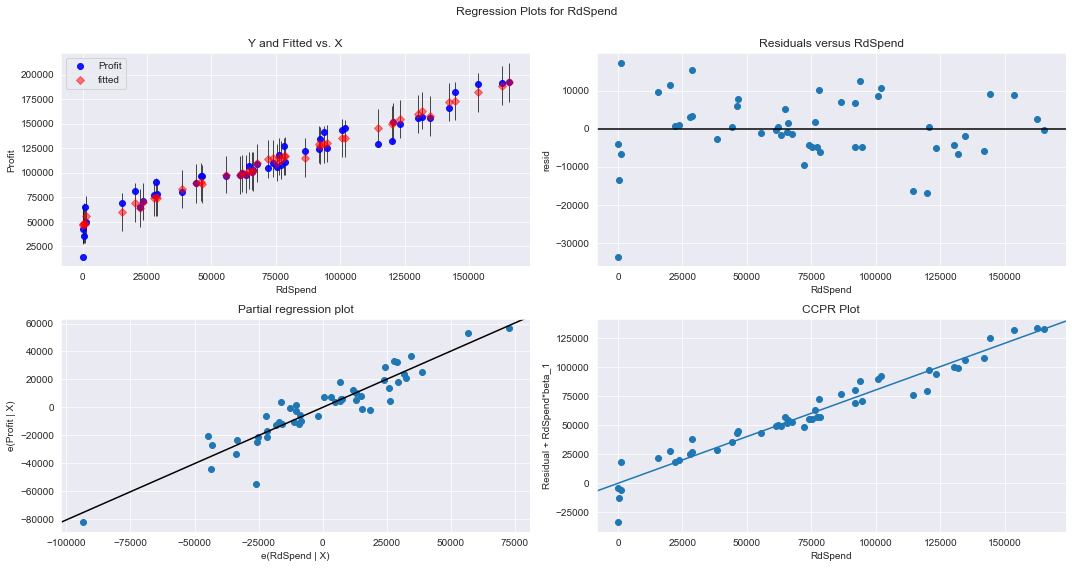

In [23]:
#with RdSpend
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(initial_model_woS, "RdSpend", fig=fig)
plt.show()

__Residual Vs RdSpend__:
- no pattern, so far good model
__Partial Regression Plot__:
- there is strong positive relation seen between R & D spend and Profit.

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

__Values > 1__: __None__

## High Influence points

__Leverage value is 0.36__, however we have no valueue byeond 0.36, so there are no outliers

# Improving the model

In [24]:
#Load the data

In [25]:
#Discard the data points which are influencers and reasign the row number (reset_index())

In [26]:
#Drop the original index

# Build Model

# Cook’s Distance

## Predicting for new data